<a href="https://colab.research.google.com/github/Harshitprajapati10/Makemore-pytorch/blob/main/MakeMore02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP NN for next character

In [16]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
words = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [18]:
len(words)

32033

In [19]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [20]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
X,Y = [],[]
for w in words[:5]:

  print(w)
  context = [0]*block_size
  for ch in w + '.' :
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context),'--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [21]:
X.shape, Y.shape, X.dtype, Y.dtype

(torch.Size([32, 3]), torch.Size([32]), torch.int64, torch.int64)

In [22]:
X,Y

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1],
         [ 0,  0,  0],
         [ 0,  0, 15],
         [ 0, 15, 12],
         [15, 12,  9],
         [12,  9, 22],
         [ 9, 22,  9],
         [22,  9,  1],
         [ 0,  0,  0],
         [ 0,  0,  1],
         [ 0,  1, 22],
         [ 1, 22,  1],
         [ 0,  0,  0],
         [ 0,  0,  9],
         [ 0,  9, 19],
         [ 9, 19,  1],
         [19,  1,  2],
         [ 1,  2,  5],
         [ 2,  5, 12],
         [ 5, 12, 12],
         [12, 12,  1],
         [ 0,  0,  0],
         [ 0,  0, 19],
         [ 0, 19, 15],
         [19, 15, 16],
         [15, 16,  8],
         [16,  8,  9],
         [ 8,  9,  1]]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [23]:
C = torch.randn((27,2))
C.shape

torch.Size([27, 2])

In [24]:
C[5]

tensor([1.9854, 0.5031])

In [25]:
F.one_hot(torch.tensor(5),num_classes=27).float() @ C

tensor([1.9854, 0.5031])

In [26]:
# same index embedded multiple times
C[torch.tensor([5,6,3,3,3,3,3])]

tensor([[ 1.9854,  0.5031],
        [-0.0945,  0.0966],
        [-0.8709, -1.0446],
        [-0.8709, -1.0446],
        [-0.8709, -1.0446],
        [-0.8709, -1.0446],
        [-0.8709, -1.0446]])

In [27]:
C[X].shape, C[X]

(torch.Size([32, 3, 2]),
 tensor([[[-0.4448,  0.4979],
          [-0.4448,  0.4979],
          [-0.4448,  0.4979]],
 
         [[-0.4448,  0.4979],
          [-0.4448,  0.4979],
          [ 1.9854,  0.5031]],
 
         [[-0.4448,  0.4979],
          [ 1.9854,  0.5031],
          [ 1.0790, -1.0734]],
 
         [[ 1.9854,  0.5031],
          [ 1.0790, -1.0734],
          [ 1.0790, -1.0734]],
 
         [[ 1.0790, -1.0734],
          [ 1.0790, -1.0734],
          [-0.1982, -0.7062]],
 
         [[-0.4448,  0.4979],
          [-0.4448,  0.4979],
          [-0.4448,  0.4979]],
 
         [[-0.4448,  0.4979],
          [-0.4448,  0.4979],
          [-1.0531, -1.6418]],
 
         [[-0.4448,  0.4979],
          [-1.0531, -1.6418],
          [-0.9666,  0.3565]],
 
         [[-1.0531, -1.6418],
          [-0.9666,  0.3565],
          [ 0.3817, -0.5918]],
 
         [[-0.9666,  0.3565],
          [ 0.3817, -0.5918],
          [-0.1190, -0.7939]],
 
         [[ 0.3817, -0.5918],
          [-0.1

In [28]:
X[13,2]

tensor(1)

In [29]:
C[X][13,2]


tensor([-0.1982, -0.7062])

In [30]:
C[1]

tensor([-0.1982, -0.7062])

In [32]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [33]:
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([32, 6])

In [34]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [35]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [36]:
a.storage()

/tmp/ipython-input-214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [37]:
emb.shape

torch.Size([32, 3, 2])

In [40]:
emb.view(32,6)

tensor([[-0.4448,  0.4979, -0.4448,  0.4979, -0.4448,  0.4979],
        [-0.4448,  0.4979, -0.4448,  0.4979,  1.9854,  0.5031],
        [-0.4448,  0.4979,  1.9854,  0.5031,  1.0790, -1.0734],
        [ 1.9854,  0.5031,  1.0790, -1.0734,  1.0790, -1.0734],
        [ 1.0790, -1.0734,  1.0790, -1.0734, -0.1982, -0.7062],
        [-0.4448,  0.4979, -0.4448,  0.4979, -0.4448,  0.4979],
        [-0.4448,  0.4979, -0.4448,  0.4979, -1.0531, -1.6418],
        [-0.4448,  0.4979, -1.0531, -1.6418, -0.9666,  0.3565],
        [-1.0531, -1.6418, -0.9666,  0.3565,  0.3817, -0.5918],
        [-0.9666,  0.3565,  0.3817, -0.5918, -0.1190, -0.7939],
        [ 0.3817, -0.5918, -0.1190, -0.7939,  0.3817, -0.5918],
        [-0.1190, -0.7939,  0.3817, -0.5918, -0.1982, -0.7062],
        [-0.4448,  0.4979, -0.4448,  0.4979, -0.4448,  0.4979],
        [-0.4448,  0.4979, -0.4448,  0.4979, -0.1982, -0.7062],
        [-0.4448,  0.4979, -0.1982, -0.7062, -0.1190, -0.7939],
        [-0.1982, -0.7062, -0.1190, -0.7

In [42]:
emb.view(32,6) == torch.cat(torch.unbind(emb,1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [43]:
# creating hidden layer neurons
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [51]:
# h = emb.view(32,6) @ W1 + b1
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
h

tensor([[ 2.5040e-01, -9.8992e-01,  4.4884e-01,  ...,  8.1471e-01,
          8.7665e-01,  9.9961e-01],
        [ 9.9863e-01, -5.7592e-01, -9.5476e-01,  ..., -8.7683e-01,
         -9.0375e-01,  9.9673e-01],
        [-9.9808e-01, -9.7312e-01, -9.9987e-01,  ..., -9.6242e-01,
         -9.9929e-01, -8.2055e-01],
        ...,
        [ 9.9180e-01, -6.5421e-01,  5.9875e-01,  ...,  1.4091e-01,
          9.9956e-01,  9.9996e-01],
        [-9.9972e-01, -9.9035e-01, -9.8852e-01,  ..., -3.8196e-01,
          9.3546e-01,  9.9927e-01],
        [ 5.5619e-01, -9.8969e-01, -9.1050e-01,  ...,  8.5086e-05,
         -9.9988e-01, -9.4878e-01]])

In [52]:
h.shape

torch.Size([32, 100])

In [53]:
# outer layer
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [54]:
logits = h@W2 + b2

In [55]:
logits.shape

torch.Size([32, 27])

In [56]:
counts = logits.exp()

In [57]:
prob = counts / counts.sum(1,keepdims=True)
prob.shape

torch.Size([32, 27])

In [60]:
prob[0].sum()

tensor(1.)

In [61]:
prob[torch.arange(32),Y]

tensor([7.6648e-08, 7.8295e-10, 1.5797e-10, 3.5057e-16, 1.0789e-06, 6.8959e-01,
        7.9190e-05, 4.8865e-06, 1.3913e-08, 1.1119e-08, 2.3592e-11, 6.6708e-05,
        1.5387e-04, 2.4770e-03, 4.2669e-10, 5.8415e-05, 2.1949e-04, 2.8459e-07,
        1.2867e-12, 2.8059e-06, 1.8708e-08, 1.6410e-14, 1.2655e-08, 8.2044e-03,
        8.0738e-05, 3.0308e-05, 7.1724e-06, 2.3108e-12, 1.7641e-11, 6.0183e-05,
        6.3260e-11, 3.6704e-01])

In [62]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [63]:
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(15.6719)

In [64]:
 # --------------Now Made RESPECTABLE ----------->

In [65]:
X.shape, Y.shape # dataset

(torch.Size([32, 3]), torch.Size([32]))

In [66]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100),generator=g)
b1 = torch.randn(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

In [67]:
sum(p.nelement() for p in parameters)

3481

In [74]:
# FORWARD PASS
emb = C[X] # (32,3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2 #(32,37)
counts = logits.exp()
prob = counts / counts.sum(1,keepdims=True)
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(17.7697)

In [72]:
# example , why use cross_entropy
# logits1 = torch.tensor([-5, -1,0,100]) #tensor([0., 0., 0., nan])
logits1 = torch.tensor([0., 0., 0., 100]) - 100 # subtract the largest value(cross_entropy does it internally)
counts1 = logits1.exp()
prob1 = counts1 / counts1.sum()
prob1

tensor([3.7835e-44, 3.7835e-44, 3.7835e-44, 1.0000e+00])

In [75]:
# for above there is fn in pytorch
# use cross entropy bcoz i) forward pass is much more efficient ii)backward pass in much more efficient
# iii) normalize without showing ridiculour behaviour
loss = F.cross_entropy(logits,Y)
loss

tensor(17.7697)

In [76]:
for p in parameters:
  p.requires_grad = True

In [81]:
for _ in range(1000):
  # forward pass
  emb = C[X] # (32,3,2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h @ W2 + b2 #(32,37)
  loss = F.cross_entropy(logits,Y) # loss
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += -0.1 * p.grad

print(loss.item())



0.25280269980430603


In [84]:
logits.max(1) #predictions # overfitted # different for where features are "..."

torch.return_types.max(
values=tensor([14.2441, 19.6046, 21.4415, 21.8355, 18.0163, 14.2441, 17.2563, 15.2032,
        16.9542, 19.8493, 17.3314, 22.2452, 14.2441, 18.6801, 18.5684, 21.5518,
        14.2441, 17.8850, 16.8029, 18.5967, 19.7065, 17.4369, 12.1964, 11.8596,
        16.4463, 14.2441, 17.3616, 18.1731, 13.6769, 17.2401, 20.6231, 17.8251],
       grad_fn=<MaxBackward0>),
indices=tensor([ 9, 13, 13,  1,  0,  9, 12,  9, 22,  9,  1,  0,  9, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0,  9, 15, 16,  8,  9,  1,  0]))

In [85]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [87]:
## -------DOING ON FULL DATASET ----------->

In [88]:
# build the dataset
block_size = 3
X,Y = [],[]
for w in words:
  context = [0]*block_size
  for ch in w + '.' :
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context),'--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [89]:
X.shape, Y.shape, X.dtype, Y.dtype

(torch.Size([228146, 3]), torch.Size([228146]), torch.int64, torch.int64)

In [137]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100),generator=g)
b1 = torch.randn(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

In [138]:
for p in parameters:
  p.requires_grad = True

In [123]:
for _ in range(10):

  # mini batch construct
  ix = torch.randint(0,X.shape[0],(32,))

  # forward pass
  emb = C[X[ix]] # (32,3,2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h @ W2 + b2 #(32,37)
  loss = F.cross_entropy(logits,Y[ix]) # loss
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += -0.1 * p.grad

# print(loss.item())



18.50090789794922
20.176122665405273
16.382545471191406
15.805428504943848
14.271064758300781
11.734606742858887
12.466114044189453
11.374042510986328
9.456823348999023
12.822074890136719


In [113]:
# loss on entire dataset
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Y)
loss

tensor(2.5829, grad_fn=<NllLossBackward0>)

In [95]:
torch.randint(0,X.shape[0],(32,)) # out shape : [32] elements b/w 0 and X.shape[0]

tensor([146322,  82311,  24916, 200837, 139563,  26025, 224351,   8609,  80193,
        179597, 114064, 120610, 125648,  66778,  54821, 144849, 160410, 150719,
        224908, 164626, 224700,  88366, 109343, 108234,  12184, 194069, 156422,
         37300,  22375,  95236, 213293, 118009])

### find a good initial learning rate

In [124]:
## LR is between 1 and 0.001

In [129]:
lre = torch.linspace(-3,0,1000) # lr b/w 0.001 and 1 using exp steps
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [141]:
lri = []
lossi = []

for i in range(10000):

  # mini batch construct
  ix = torch.randint(0,X.shape[0],(32,))

  # forward pass
  emb = C[X[ix]] # (32,3,2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h @ W2 + b2 #(32,37)
  loss = F.cross_entropy(logits,Y[ix]) # loss
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr* p.grad

  #track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

print(loss.item())

# loss = 2.32 beats biagram model |(2.47)

2.3255887031555176


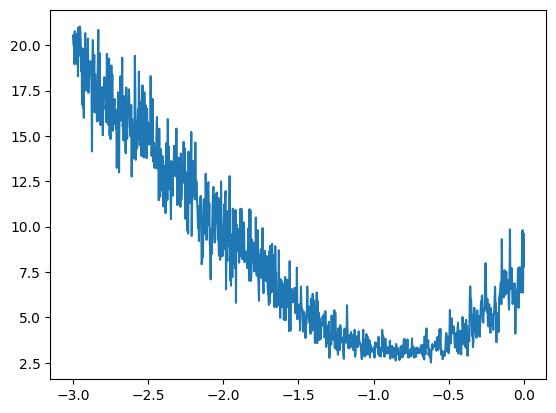

In [135]:
plt.plot(lri,lossi) # good lr is 0.1 from graph

### splitting the data into train-valid-test

train -> train parameters

valid -> trian hyperparameters

test -> used to evaluate perf of the model at the end

In [142]:
# build the dataset
def build_dataset(words):
  block_size = 3 # context length: how many characters do we take to predict the next one?
  X,Y = [],[]
  for w in words:

    context = [0]*block_size
    for ch in w + '.' :
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i] for i in context),'--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X,Y

import random
random.seed(42)
random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr,Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [143]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [144]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100),generator=g)
b1 = torch.randn(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

In [145]:
for p in parameters:
  p.requires_grad = True

In [146]:
lre = torch.linspace(-3,0,1000) # lr b/w 0.001 and 1 using exp steps
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [148]:
lri = []
lossi = []

for i in range(30000):

  # mini batch construct
  ix = torch.randint(0,Xtr.shape[0],(32,))

  # forward pass
  emb = C[Xtr[ix]] # (32,3,2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h @ W2 + b2 #(32,37)
  loss = F.cross_entropy(logits,Ytr[ix]) # loss
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr* p.grad

  #track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

print(loss.item())


2.561169147491455


In [149]:
# loss on entire dataset
emb = C[Xdev]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev)
loss

tensor(2.3935, grad_fn=<NllLossBackward0>)

## experiment using the hidden layer with 300 neurons

In [150]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,300),generator=g)
b1 = torch.randn(300,generator=g)
W2 = torch.randn((300,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

In [152]:
sum(p.nelement() for p in parameters)

10281

In [153]:
for p in parameters:
  p.requires_grad = True

In [154]:
lre = torch.linspace(-3,0,1000) # lr b
lrs = 10**lre

In [155]:
lri = []
stepi = []
lossi = []

for i in range(30000):

  # mini batch construct
  ix = torch.randint(0,Xtr.shape[0],(32,))

  # forward pass
  emb = C[Xtr[ix]] # (32,3,2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h @ W2 + b2 #(32,37)
  loss = F.cross_entropy(logits,Ytr[ix]) # loss
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr* p.grad

  #track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.item())

print(loss.item())


2.4943954944610596


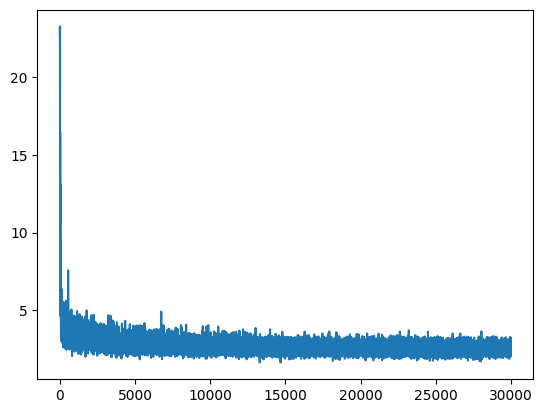

In [156]:
plt.plot(stepi, lossi)